In [1]:
from lazylib import make, AlexNet, device, takeConfusionMatrix, takeRocCurve, now, register
import torch

/home/luizp/projects/pibit/pibit/lib64/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
n = now()
epocs = 1
model, metrics = make(
    EPOCHS=epocs, 
    BATCH_SIZE=128, 
    LEARNING_RATE=1e-3, 
    csv_path="/home/luizp/projects/pibit/src/data/processed/csv/botClean.csv", 
    MODEL=AlexNet(x=128).to(device()), 
    SEED=1701,
    xcol=2
    ) 
register(metrics, f"/home/luizp/projects/pibit/src/0utput/text/{n}.txt")
torch.save(model.state_dict(), f"/home/luizp/projects/pibit/src/0utput/models/{n}_alexnet_{epocs}.nnModel")

[20-02-2024 18-33-04] Epoch 001 Acc: 0.9991 Loss: 0.01776067: 100%|██████████| 391/391 [00:14<00:00, 27.28it/s]
[20-02-2024 18-34-21] Epoch 001 Val. Acc: 0.9990 Val. Loss: 0.00136780: 100%|██████████| 3516/3516 [01:15<00:00, 46.33it/s]


[     0      0    432 449568]


[20-02-2024 18-34-37] Epoch 002 Acc: 0.9991 Loss: 0.00135118: 100%|██████████| 391/391 [00:15<00:00, 26.06it/s]
[20-02-2024 18-35-30] Epoch 002 Val. Acc: 0.9990 Val. Loss: 0.00073530: 100%|██████████| 3516/3516 [00:52<00:00, 66.74it/s]


[     0      0    432 449568]
Finished experiment!


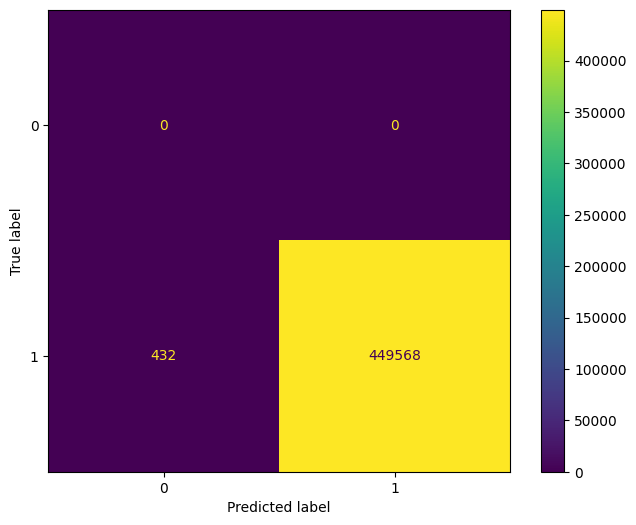

In [4]:
cm = takeConfusionMatrix(metrics, epocs-1, f"/home/luizp/projects/pibit/src/0utput/img/confusionMatix/{n}.png")

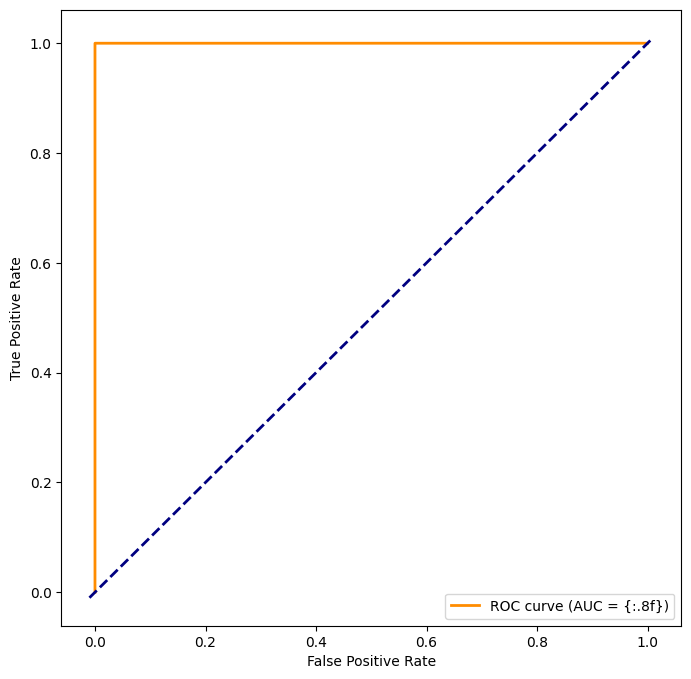

In [5]:
takeRocCurve(metrics, epocs-1, f"/home/luizp/projects/pibit/src/0utput/img/rocCurve/{n}.png")